In [62]:
#Goal - To determine if the price of Bitcoin moves more than 2 SDs across days
#This is an exploratory/experimental data analysis by Raghav, just to see if this approach would work

import pandas as pd
import numpy as np
import datetime as DT
import time
import pytz
import matplotlib.pyplot as plt

In [2]:
df_bitstamp = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-03-27.csv')
df_bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [3]:
df_bitstamp.Timestamp = pd.to_datetime(df_bitstamp.Timestamp, unit='s')
df_bitstamp.Timestamp = df_bitstamp.Timestamp.dt.tz_localize('UTC').dt.tz_convert('US/Central')
df_bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 01:52:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 01:53:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,2011-12-31 01:54:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,2011-12-31 01:55:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,2011-12-31 01:56:00-06:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [4]:
#Convert Timestamp into separate Date and Time
temp = pd.DatetimeIndex(df_bitstamp['Timestamp']) #Gather all datetime objects
df_bitstamp['Date'] = temp.date #Pull out the date from the datetime objects and assign to Date column
df_bitstamp['Time'] = temp.time #Pull out the time from the datetime objects and assign to Time column
del df_bitstamp['Timestamp'] #Delete original datetime column

df_bitstamp.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Time
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:52:00
1,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:53:00
2,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:54:00
3,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:55:00
4,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31,01:56:00


In [8]:
#Re-order columns for easier reference
#At this stage, the columns look like:
#['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Date', 'Time']
#The following line re-orders the columns.
#https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

df_bitstamp = df_bitstamp[['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
df_bitstamp.head()

,Date,Time,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,01:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31,01:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,2011-12-31,01:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,2011-12-31,01:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,2011-12-31,01:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [49]:
#I want to remove the December 31st data so we can start on January 1st, 2012
#This code finds the index of the first entry for 2012
df_bitstamp[df_bitstamp.Date == datetime.date(DT.datetime.strptime('1/1/12', '%x'))].index[0]

1328

In [57]:
#Slice the dataframe to start on 01/01/2012
df_bitstamp = df_bitstamp.loc[1328:]

#Reset the row numbering and don't maintain the old index as a column
df_bitstamp = df_bitstamp.reset_index(drop = True)
df_bitstamp.head()

,Date,Time,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2012-01-01,00:00:00,4.58,4.58,4.58,4.58,1.502,6.87916,4.58
1,2012-01-01,00:01:00,4.58,4.58,4.58,4.58,1.502,6.87916,4.58
2,2012-01-01,00:02:00,4.58,4.58,4.58,4.58,1.502,6.87916,4.58
3,2012-01-01,00:03:00,4.58,4.58,4.58,4.58,1.502,6.87916,4.58
4,2012-01-01,00:04:00,4.58,4.58,4.58,4.58,1.502,6.87916,4.58


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


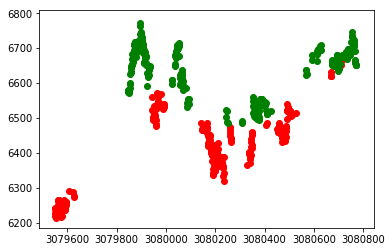

In [86]:
index_1 = df_bitstamp[df_bitstamp.Date == datetime.date(DT.datetime.strptime('11/13/17', '%x'))].index[0]
index_2 = df_bitstamp[df_bitstamp.Date == datetime.date(DT.datetime.strptime('11/14/17', '%x'))].index[0]
df_m = df_bitstamp.loc[index_1:index_2]

df_m.head()

df_m['min'] = df_m.Weighted_Price[(df_m.Weighted_Price.shift(100) > df_m.Weighted_Price) & (df_m.Weighted_Price.shift(-100) > df_m.Weighted_Price)]
df_m['max'] = df_m.Weighted_Price[(df_m.Weighted_Price.shift(100) < df_m.Weighted_Price) & (df_m.Weighted_Price.shift(-100) < df_m.Weighted_Price)]

#plt.plot(df_m.index, df_m.Weighted_Price)
plt.scatter(df_m.index, df_m['min'], c='r')
plt.scatter(df_m.index, df_m['max'], c='g')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).max()
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).min()
  This is separate from the ipykernel package so we can avoid doing imports until


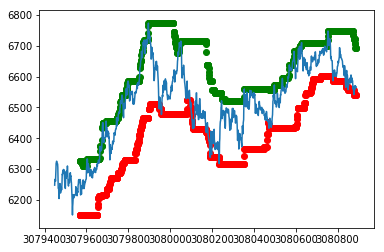

In [97]:
plt.plot(df_m.index, df_m.Weighted_Price)
plt.scatter(df_m.index, pd.rolling_max(df_m.Weighted_Price, 120), c='g')
plt.scatter(df_m.index, pd.rolling_min(df_m.Weighted_Price, 120), c='r')
plt.show()